![Frame 311.png](<attachment:Frame 311.png>)
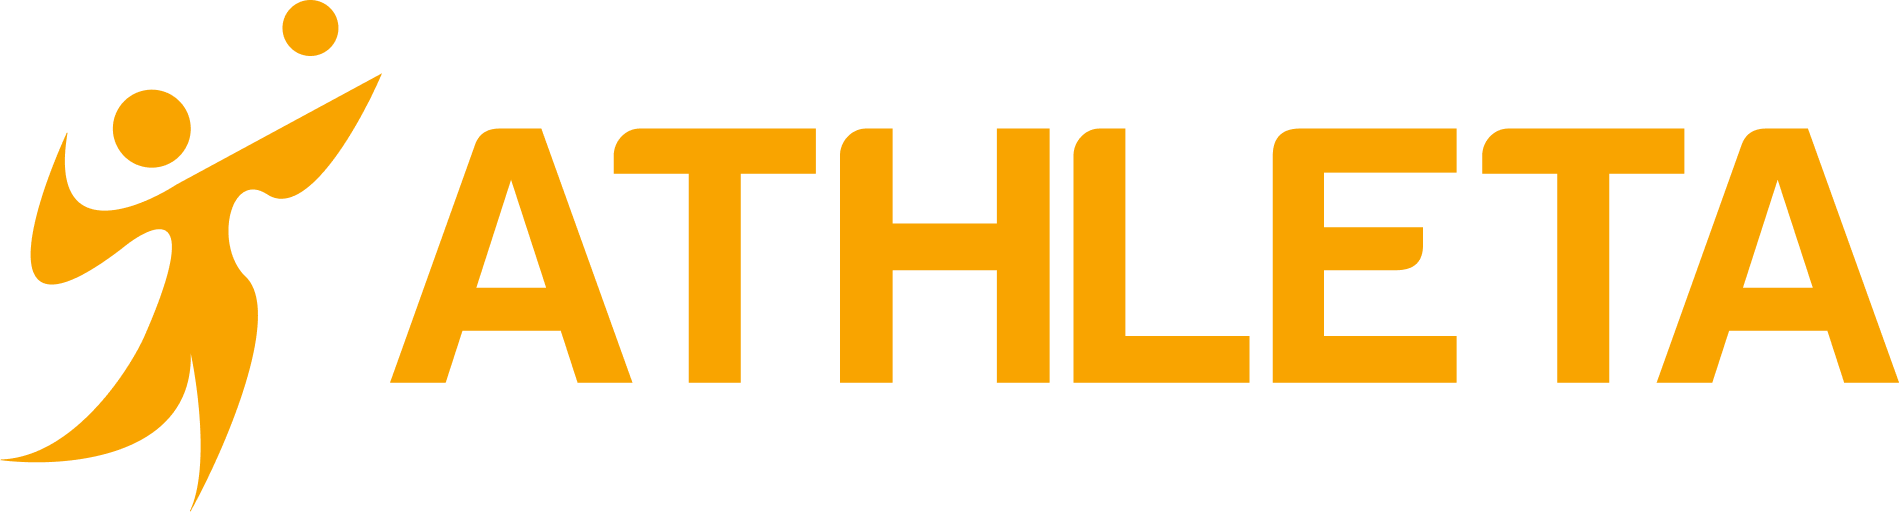

# Analise sobre o potencial usuario do nosso aplicativo

#### Impotações

In [23]:

import pandas as pd
import pickle
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import tree
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import unicodedata
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, 
    multilabel_confusion_matrix, 
    accuracy_score, 
    classification_report, 
    precision_recall_fscore_support
)
from sklearn.datasets import make_classification

### Tratando a base

In [24]:
#lendo o df_ATHLETA
df_ATHLETA = pd.read_csv('ATHLETA.csv')

In [25]:
#deletando colunas que não usariamos na analise
colunas_deletar=['Carimbo de data/hora','Nome Completo']
df_ATHLETA=df_ATHLETA.drop(columns=colunas_deletar)
display(df_ATHLETA)

,Coloque sua faixa etária,Gênero,Localização (Cidade),Renda familiar,Profissão,Quais esportes você pratica atualmente?,Quais esportes você tem interesse em experimentar?,Qual é o seu nível de envolvimento com esportes não tão conhecidos?,Você já participou de eventos ou competições relacionadas a esportes não tão conhecidos?,Com que frequência você pratica esportes?,Qual é a sua principal motivação para praticar esportes?,Qual canal você usa para se informar sobre esportes?,Você usa aplicativos para monitorar sua prática esportiva?,Com que frequência você usa aplicativos relacionados a esportes?,O que você gostaria de ver em um aplicativo sobre esportes não tão conhecidos?,Qual funcionalidade você considera essencial em um aplicativo esportivo?,Informe seu estado:
0,Menos de 18 anos,Feminino,Osasco,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Programador,"Futebol, Tênis de mesa","Voleibol, Esgrima",Médio,Não,Semanalmente,Saúde,Redes sociais,Sim,Semanalmente,Conteúdo,Informações sobre esportes,SP
1,Menos de 18 anos,Masculino,São Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Estudante,"Futebol, Caminhada e corrida, Voleibol, Academ...","Atletismo, Esgrima, Baseball, Badminton",Alto,Sim,Diariamente,Competição,Redes sociais,Sim,Diariamente,Conteúdo,Informações sobre esportes,SP
2,Menos de 18 anos,Masculino,São Paulo,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estudante,"Futebol, Caminhada e corrida, Voleibol, Academ...",Baseball,Alto,Sim,Diariamente,Competição,Outro,Não,Diariamente,Funcionalidades específicas,Rastreamento de desempenho,SP
3,Menos de 18 anos,Masculino,São Paulo,Classe A: superior a R$ 22 mil,Estudante,"Futebol, Tênis de mesa",Academia e musculação,Baixo,Sim,Semanalmente,Competição,Sites especializados,Não,Diariamente,Eventos,Informações sobre esportes,SP
4,Menos de 18 anos,Feminino,São Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Analista de TI,"Caminhada e corrida, Academia e musculação, Tê...","Futebol, Voleibol, Natação, Ciclismo, Basquete...",Baixo,Não,Semanalmente,Saúde,Redes sociais,Sim,Semanalmente,Funcionalidades específicas,Rastreamento de desempenho,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Menos de 18 anos,Masculino,São Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Jovem Aprendiz,"Futebol, Tênis de mesa","Caminhada e corrida, Academia e musculação, Ba...",Baixo,Sim,Diariamente,Competição,Redes sociais,Não,Nunca,Conteúdo,Rastreamento de desempenho,SP
171,Menos de 18 anos,Masculino,Osasco,"Classe B: entre R$7,1 mil e R$ 22 mil",Estagiário,Nenhum,"Voleibol, Badminton",Baixo,Não,Raramente,Lazer,Redes sociais,Não,Raramente,Eventos,Comunidade de praticantes,SP
172,Menos de 18 anos,Masculino,Osasco,"Classe B: entre R$7,1 mil e R$ 22 mil",Analista,Basquetebol,"Voleibol, Natação",Baixo,Sim,Diariamente,Lazer,Redes sociais,Não,Diariamente,Conteúdo,Informações sobre esportes,SP
173,Menos de 18 anos,Masculino,Diadema,"Classe B: entre R$7,1 mil e R$ 22 mil",Desenvolvedor de Sistemas e analista de dados,"Futebol, Voleibol, Academia e musculação, Nata...",Baseball,Nenhum,Sim,Diariamente,Lazer,Redes sociais,Sim,Semanalmente,Outro,Notificações de eventos,SP


#### Transformando em array e separando esportes em colunas binarias

In [26]:
#transformando em array
df_ATHLETA['Quais esportes você pratica atualmente?'] = df_ATHLETA['Quais esportes você pratica atualmente?'].apply(lambda x: x.split(', '))
df_ATHLETA['Quais esportes você tem interesse em experimentar?'] = df_ATHLETA['Quais esportes você tem interesse em experimentar?'].apply(lambda x: x.split(', '))

In [ ]:
#selecionando os esportes unicos da coluna de esportes de esportes que pratica atualmente
esportes_pratica_unicos = set(esporte for sublist in df_ATHLETA['Quais esportes você pratica atualmente?'] for esporte in sublist)

#criando as colunas com o prefixo _pratica para identificação
for esporte in esportes_pratica_unicos:
    df_ATHLETA[f'{esporte}_pratica'] = df_ATHLETA['Quais esportes você pratica atualmente?'].apply(lambda x: 1 if esporte in x else 0)




In [28]:
#selecionando os pesportes unicos da coluna de esportes de interresse
esportes_experimenta_unicos = set(esporte for sublist in df_ATHLETA['Quais esportes você tem interesse em experimentar?'] for esporte in sublist)
#criando as colunas com o prefixo _experimenta para identificação
for esporte in esportes_experimenta_unicos:
    df_ATHLETA[f'{esporte}_experimenta'] = df_ATHLETA['Quais esportes você tem interesse em experimentar?'].apply(lambda x: 1 if esporte in x else 0)


In [29]:
#removendo as colunas originais do dataframe
colunas_deletar=['Quais esportes você pratica atualmente?','Quais esportes você tem interesse em experimentar?']
df_ATHLETA = df_ATHLETA.drop(columns=colunas_deletar)
pd.set_option('display.max_columns', None)
display(df_ATHLETA)

,Coloque sua faixa etária,Gênero,Localização (Cidade),Renda familiar,Profissão,Qual é o seu nível de envolvimento com esportes não tão conhecidos?,Você já participou de eventos ou competições relacionadas a esportes não tão conhecidos?,Com que frequência você pratica esportes?,Qual é a sua principal motivação para praticar esportes?,Qual canal você usa para se informar sobre esportes?,Você usa aplicativos para monitorar sua prática esportiva?,Com que frequência você usa aplicativos relacionados a esportes?,O que você gostaria de ver em um aplicativo sobre esportes não tão conhecidos?,Qual funcionalidade você considera essencial em um aplicativo esportivo?,Informe seu estado:,Ciclismo_pratica,Tênis de mesa_pratica,Voleibol_pratica,Natação_pratica,Atletismo_pratica,Nenhum_pratica,Futebol_pratica,Badminton_pratica,Esgrima_pratica,Caminhada e corrida_pratica,Academia e musculação_pratica,Basquetebol_pratica,Ciclismo_experimenta,Voleibol_experimenta,Natação_experimenta,Atletismo_experimenta,Tênis de mesa_experimenta,Academia e musculação_experimenta,Futebol_experimenta,Esgrima_experimenta,Caminhada e corrida_experimenta,Baseball_experimenta,Badminton_experimenta,Basquetebol_experimenta
0,Menos de 18 anos,Feminino,Osasco,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Programador,Médio,Não,Semanalmente,Saúde,Redes sociais,Sim,Semanalmente,Conteúdo,Informações sobre esportes,SP,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,Menos de 18 anos,Masculino,São Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Estudante,Alto,Sim,Diariamente,Competição,Redes sociais,Sim,Diariamente,Conteúdo,Informações sobre esportes,SP,1,1,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0
2,Menos de 18 anos,Masculino,São Paulo,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estudante,Alto,Sim,Diariamente,Competição,Outro,Não,Diariamente,Funcionalidades específicas,Rastreamento de desempenho,SP,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,Menos de 18 anos,Masculino,São Paulo,Classe A: superior a R$ 22 mil,Estudante,Baixo,Sim,Semanalmente,Competição,Sites especializados,Não,Diariamente,Eventos,Informações sobre esportes,SP,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Menos de 18 anos,Feminino,São Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Analista de TI,Baixo,Não,Semanalmente,Saúde,Redes sociais,Sim,Semanalmente,Funcionalidades específicas,Rastreamento de desempenho,SP,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Menos de 18 anos,Masculino,São Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Jovem Aprendiz,Baixo,Sim,Diariamente,Competição,Redes sociais,Não,Nunca,Conteúdo,Rastreamento de desempenho,SP,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
171,Menos de 18 anos,Masculino,Osasco,"Classe B: entre R$7,1 mil e R$ 22 mil",Estagiário,Baixo,Não,Raramente,Lazer,Redes sociais,Não,Raramente,Eventos,Comunidade de praticantes,SP,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
172,Menos de 18 anos,Masculino,Osasco,"Classe B: entre R$7,1 mil e R$ 22 mil",Analista,Baixo,Sim,Diariamente,Lazer,Redes sociais,Não,Diariamente,Conteúdo,Informações sobre esportes,SP,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
173,Menos de 18 anos,Masculino,Diadema,"Classe B: entre R$7,1 mil e R$ 22 mil",Desenvolvedor de Sistemas e analista de dados,Nenhum,Sim,Diariamente,Lazer,Redes sociais,Sim,Semanalmente,Outro,Notificações de eventos,SP,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
#tratando valores de nenhum e estudante
for i in range(len(df_ATHLETA)):
    if 'estudante' in df_ATHLETA.loc[i, 'Profissão']:
        df_ATHLETA.loc[i, 'Profissão'] = 'nenhum'

In [31]:
#função que remove os acentos do texto
def remove_acentos(texto):
    if isinstance(texto, str):
        return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
    return texto

#aplicando a função de remoção de acentos
df_ATHLETA = df_ATHLETA.applymap(remove_acentos)

C:\Users\stephanysilva-ieg\AppData\Local\Temp\ipykernel_25652\3734797305.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ATHLETA = df_ATHLETA.applymap(remove_acentos)


In [32]:
#seprando em x e y
y = df_ATHLETA['Você usa aplicativos para monitorar sua prática esportiva?']
X = df_ATHLETA.drop(columns='Você usa aplicativos para monitorar sua prática esportiva?')
display(X)

,Coloque sua faixa etária,Gênero,Localização (Cidade),Renda familiar,Profissão,Qual é o seu nível de envolvimento com esportes não tão conhecidos?,Você já participou de eventos ou competições relacionadas a esportes não tão conhecidos?,Com que frequência você pratica esportes?,Qual é a sua principal motivação para praticar esportes?,Qual canal você usa para se informar sobre esportes?,Com que frequência você usa aplicativos relacionados a esportes?,O que você gostaria de ver em um aplicativo sobre esportes não tão conhecidos?,Qual funcionalidade você considera essencial em um aplicativo esportivo?,Informe seu estado:,Ciclismo_pratica,Tênis de mesa_pratica,Voleibol_pratica,Natação_pratica,Atletismo_pratica,Nenhum_pratica,Futebol_pratica,Badminton_pratica,Esgrima_pratica,Caminhada e corrida_pratica,Academia e musculação_pratica,Basquetebol_pratica,Ciclismo_experimenta,Voleibol_experimenta,Natação_experimenta,Atletismo_experimenta,Tênis de mesa_experimenta,Academia e musculação_experimenta,Futebol_experimenta,Esgrima_experimenta,Caminhada e corrida_experimenta,Baseball_experimenta,Badminton_experimenta,Basquetebol_experimenta
0,Menos de 18 anos,Feminino,Osasco,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Programador,Medio,Nao,Semanalmente,Saude,Redes sociais,Semanalmente,Conteudo,Informacoes sobre esportes,SP,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,Menos de 18 anos,Masculino,Sao Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Estudante,Alto,Sim,Diariamente,Competicao,Redes sociais,Diariamente,Conteudo,Informacoes sobre esportes,SP,1,1,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0
2,Menos de 18 anos,Masculino,Sao Paulo,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estudante,Alto,Sim,Diariamente,Competicao,Outro,Diariamente,Funcionalidades especificas,Rastreamento de desempenho,SP,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,Menos de 18 anos,Masculino,Sao Paulo,Classe A: superior a R$ 22 mil,Estudante,Baixo,Sim,Semanalmente,Competicao,Sites especializados,Diariamente,Eventos,Informacoes sobre esportes,SP,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Menos de 18 anos,Feminino,Sao Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Analista de TI,Baixo,Nao,Semanalmente,Saude,Redes sociais,Semanalmente,Funcionalidades especificas,Rastreamento de desempenho,SP,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Menos de 18 anos,Masculino,Sao Paulo,"Classe B: entre R$7,1 mil e R$ 22 mil",Jovem Aprendiz,Baixo,Sim,Diariamente,Competicao,Redes sociais,Nunca,Conteudo,Rastreamento de desempenho,SP,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
171,Menos de 18 anos,Masculino,Osasco,"Classe B: entre R$7,1 mil e R$ 22 mil",Estagiario,Baixo,Nao,Raramente,Lazer,Redes sociais,Raramente,Eventos,Comunidade de praticantes,SP,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
172,Menos de 18 anos,Masculino,Osasco,"Classe B: entre R$7,1 mil e R$ 22 mil",Analista,Baixo,Sim,Diariamente,Lazer,Redes sociais,Diariamente,Conteudo,Informacoes sobre esportes,SP,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
173,Menos de 18 anos,Masculino,Diadema,"Classe B: entre R$7,1 mil e R$ 22 mil",Desenvolvedor de Sistemas e analista de dados,Nenhum,Sim,Diariamente,Lazer,Redes sociais,Semanalmente,Outro,Notificacoes de eventos,SP,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# Loop através de cada coluna e exibe os valores únicos
for column in df_ATHLETA.columns:
    print(f"Valores únicos na coluna '{column}':")
    print(df_ATHLETA[column].unique())
    print("\n" + "-"*40 + "\n")  # Separador para facilitar a leitura


Valores únicos na coluna 'Coloque sua faixa etária':
['Menos de 18 anos' 'Entre 25 e 34 anos' 'Entre 54 e 59 anos'
 'Entre 35 e 44 anos' 'Entre 18 e 24 anos' 'Entre 45 e 54 anos' '60+']

----------------------------------------

Valores únicos na coluna 'Gênero':
['Feminino' 'Masculino' 'Prefiro nao informar']

----------------------------------------

Valores únicos na coluna 'Localização (Cidade)':
['Osasco' 'Sao Paulo' 'Guarulhos' 'Carapicuiba' 'Avanhandava' 'Pirituba'
 'Barueri' 'Sao Paulo ' 'Santo Andre' 'Sao paulo' 'Osasco ' 'Vila Velha'
 'Taboao da Serra' 'Vitoria' 'Jundiai' 'Guarulhos ' 'Coremas'
 'Campina Grande' 'Coremas ' 'Carapicuiba ' 'Londrina' 'Santos'
 'Sao Bernardo do Campo' 'Diadema']

----------------------------------------

Valores únicos na coluna 'Renda familiar':
['Classe C: entre R$ 2,9 mil e R$ 7,1 mil'
 'Classe B: entre R$7,1 mil e R$ 22 mil' 'Classe A: superior a R$ 22 mil'
 'Classe D/E: ate R$ 2,9 mil']

----------------------------------------

Valores úni

In [34]:
#criando o processador
preprocessador = ColumnTransformer(transformers=[
    ('categoricas',OrdinalEncoder(),make_column_selector(dtype_include=['object','bool']))
],
remainder='passthrough',
verbose_feature_names_out = False)
 

X_pre= preprocessador.fit_transform(X)

### Reduzindo o numero de features usando o catboost

In [35]:
# treinando modelo com o catboost
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_pre, y)

#pegando a importancia das features
importances = model.get_feature_importance(prettified=True)

# Mapeando os índices de volta para os nomes das colunas
feature_names = X.columns
importances['Feature Name'] = importances['Feature Id'].apply(lambda x: feature_names[int(x)])

#ordenando os valores pela importancia das features
importances = importances.sort_values(by='Importances', ascending=False)

#definindo um percentual das features mais importantes
threshold_percentage = 0.25  #mantendo apenas as features com 20% de importancia
threshold_value = importances['Importances'].quantile(1 - threshold_percentage)

#filtrar as features importantes
important_features = importances[importances['Importances'] >= threshold_value]['Feature Name'].tolist()

#novo df para as features com mais importancia
X_filtered = X[important_features]

In [36]:
X_filtered =preprocessador.fit_transform(X)

### Aplicando o smote na base

In [37]:
# Aplicando o SMOTE no conjunto inteiro
smote = SMOTE(random_state=42)
X_pre, y = smote.fit_resample(X_filtered, y)

## Treinando o modelo de Arvore de Decisão

In [38]:
#seprando treino e teste 
X_treino, X_teste, y_treino, y_teste = train_test_split(X_pre, y, test_size=0.25, random_state=42)

In [39]:
#dicionario de parametros
parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

In [40]:
classificador_tree = tree.DecisionTreeClassifier(random_state=0)

#configurando o gri search
grid = GridSearchCV(estimator=classificador_tree, param_grid=parametros, cv=5, scoring='accuracy')
grid.fit(X_treino, y_treino)
classificador_tree = grid.best_estimator_

#vizualizando os valores obtidos
previsoes = classificador_tree.predict(X_teste)
reporte = classification_report(y_teste, previsoes)
print("Reporte de tudo: \n", reporte)

Reporte de tudo: 
               precision    recall  f1-score   support

         Nao       0.75      0.81      0.78        26
         Sim       0.84      0.79      0.82        34

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



## Serializando a IA

In [41]:
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', classificador_tree) 
])

In [42]:
X_treino=pd.DataFrame(X_treino)
y_treino=pd.DataFrame(y_treino)

In [43]:
pipeline.fit(X_treino, y_treino)

with open('pipeline_arvore.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
